In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import random
import math
from scipy.spatial import distance

In [2]:
def euclideanDistance(x1, x2): # Calcula la distincia euclidiana 
    # return np.sqrt(np.sum((x1 - x2)**2))
    return distance.euclidean(x1, x2)

def KMeans(k, maxIterations, image, pixels):
    valuePixels = image.reshape((-1, 3)).copy() # Pasa la imagen a un arreglo de (rows * cols) cada uno con sus tres componentes RGB
    centroids = []

    for _ in range(k): # Saca centroides random
        pixelRandom = random.randint(0, pixels) # Toma un pixel random como centroide 
        centroids.append(valuePixels[pixelRandom])
        # print("Centroide random:", str(pixelRandom) + " = " + str(valuePixels[pixelRandom]))
    # print("Centroides:\n", *centroids)

    # Comienza parte iterativa 
    for _ in range(maxIterations):
        clusters = [[] for _ in range(k)] # Crea k Clusters 
        # print(clusters)
        for index, valuePixel in enumerate(valuePixels): # Forma los clusters
            distances = [euclideanDistance(valuePixel, valueCentroid) for valueCentroid in centroids] # Calcula las distancias con cada centroide 
            minDistance = np.argmin(distances) # Regresa el indice donde esta la menor distancia (centroide)
            clusters[minDistance].append(index) # Agrega el pixel al cluster

        # Calcula nuevos centroides 
        centroidsOld = centroids 
        centroids = np.zeros((k, 3)) 
        for clusterIndex, cluster in enumerate(clusters):
            mean = np.mean(valuePixels[cluster], axis=0) # Calcula el promedio del cluster 
            centroids[clusterIndex] = mean 

        # Verifica si los centroides convergieron
        distances = [euclideanDistance(centroidsOld[i], centroids[i]) for i in range(k)]
        # print(distances)
        distances = sum(distances)
        if distances == 0:
            break
    # print("Ultimos centroides:\n", centroids)

    # Mostramos la imagen con los cluster
    for clusterIndex, cluster in enumerate(clusters): # Ultimo cluster
        valuePixels[cluster] = np.uint8(centroids[clusterIndex])
    imageClustering = valuePixels.reshape(image.shape) # Regresamos la imagen a su forma normal 

    # Quitamos algun cluster de la imagen 
    # cluster = 0
    # imageSeg = image.reshape((-1, 3)).copy() 
    # imageSeg[clusters[cluster]] = np.uint8(np.array([0, 0, 0]))
    # imageSeg = imageSeg.reshape(image.shape)
    
    # cv2.imshow("imagen original", image)
    # cv2.imshow("Imagen con clusters", imageClustering)
    # cv2.imshow("Imagen segmentada", imageSeg)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imageClustering = cv2.cvtColor(imageClustering, cv2.COLOR_BGR2RGB)
    # imageSeg = cv2.cvtColor(imageSeg, cv2.COLOR_BGR2RGB)

    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    axs[0].imshow(image)
    axs[1].imshow(imageClustering)
    # axs[2].imshow(imageSeg)

    for a in axs:
        a.set_axis_off()

    plt.show()

In [3]:
image = cv2.imread("paisaje.jpg") # Lee imagen
rows = image.shape[0]
cols = image.shape[1]
pixels = rows * cols # Pixeles totales
print("Tamaño imagen: " + str(rows) + " x " + str(cols))
print("Total pixeles:", pixels, "\n")

Tamaño imagen: 300 x 300
Total pixeles: 90000 



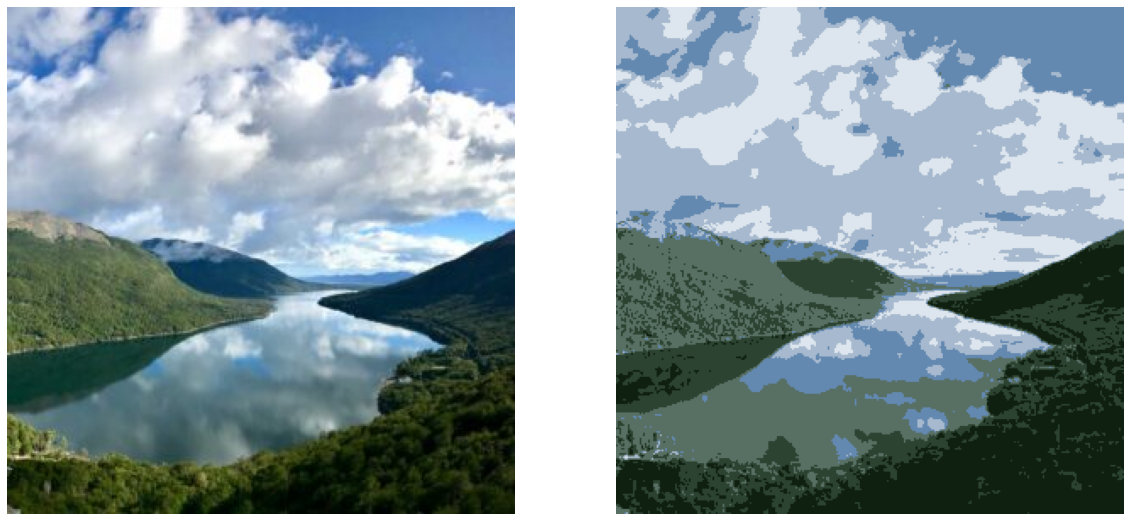

In [4]:
k = 6 # Numero de clusters
maxIterations = 20 # Iteraciones maximas para el algoritmo 
KMeans(k, maxIterations, image, pixels)